# Time Series Analysis Report: AirPassengers Dataset

## Introduction

This report presents a detailed time series analysis of the AirPassengers dataset, which records the monthly number of international airline passengers from 1949 to 1960. The primary objective is to ensure the stationarity of the dataset using differencing, logarithmic transformations, and seasonal decomposition. Stationarity is a crucial assumption for many time series forecasting models, as it implies that the statistical properties of the series do not change over time.

## Data Loading and Visualization

The dataset was loaded using the pandas library, and the original time series was plotted to visualize the data. The plot showed an increasing trend and possible seasonality, indicating that the series might not be stationary.

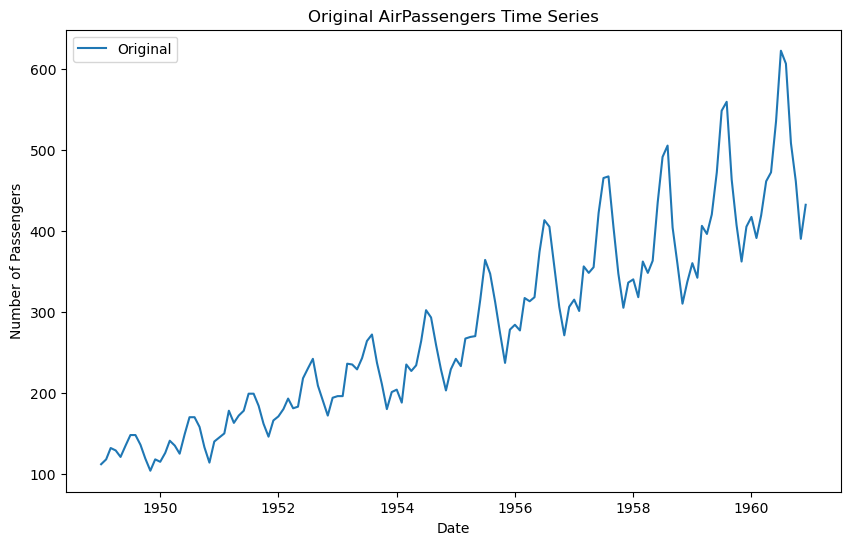

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

# Plot the original time series
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.title('Original AirPassengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()


## Stationarity Test

The Augmented Dickey-Fuller (ADF) test was used to check for stationarity. The results showed a high p-value (> 0.05), indicating that the series was not stationary.

In [11]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
result = adfuller(data['#Passengers'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critical Values: {result[4]}')

if result[1] < 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: 0.8153688792060543
p-value: 0.9918802434376411
Critical Values: {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}
The series is not stationary.


## Logarithmic Transformation

To stabilize the variance, a logarithmic transformation was applied to the data. The transformed series was plotted, showing a more stable variance over time.

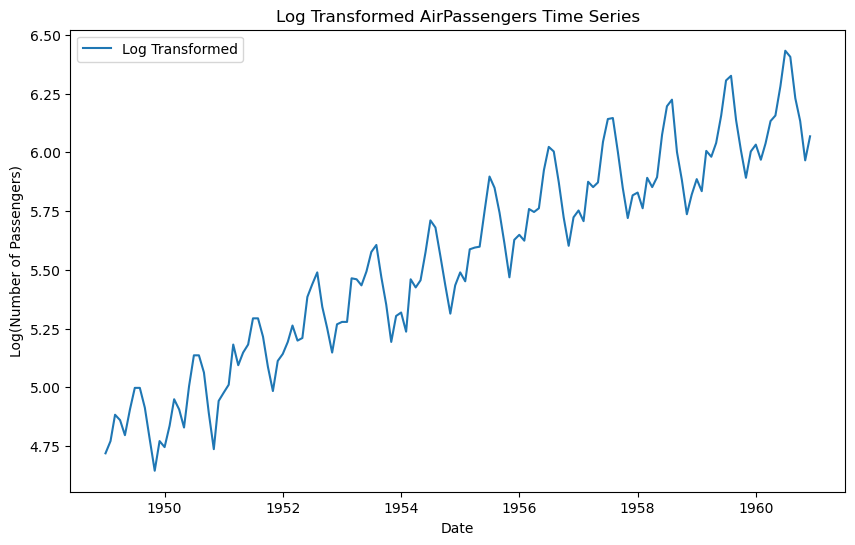

In [12]:
# Apply log transformation
log_data = np.log(data['#Passengers'])
plt.figure(figsize=(10, 6))
plt.plot(log_data, label='Log Transformed')
plt.title('Log Transformed AirPassengers Time Series')
plt.xlabel('Date')
plt.ylabel('Log(Number of Passengers)')
plt.legend()
plt.show()


## Differencing

First-order differencing was applied to the log-transformed series to remove the trend and make the series stationary. The differenced series was plotted and re-evaluated using the ADF test.

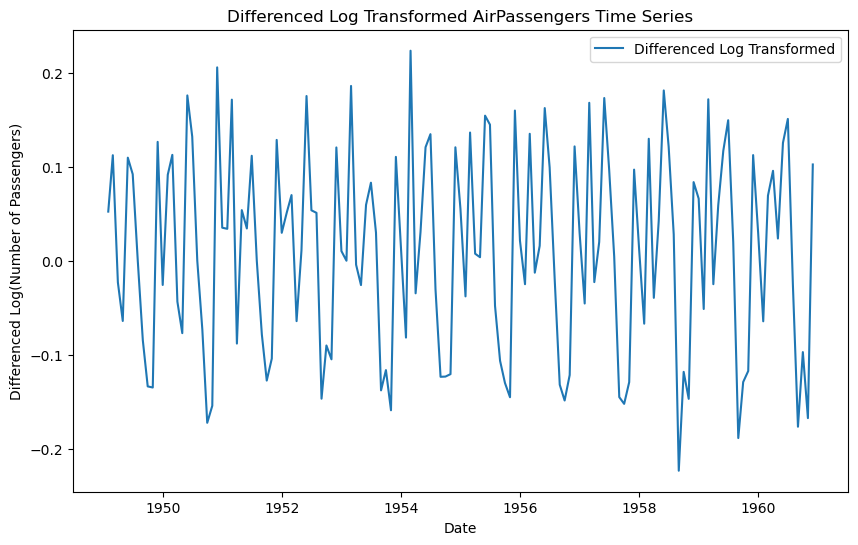

ADF Statistic (Differenced): -2.7171305983881595
p-value (Differenced): 0.07112054815085424
Critical Values (Differenced): {'1%': -3.4825006939887997, '5%': -2.884397984161377, '10%': -2.578960197753906}
The differenced series is not stationary.


In [13]:
# Apply first-order differencing
diff_log_data = log_data.diff().dropna()
plt.figure(figsize=(10, 6))
plt.plot(diff_log_data, label='Differenced Log Transformed')
plt.title('Differenced Log Transformed AirPassengers Time Series')
plt.xlabel('Date')
plt.ylabel('Differenced Log(Number of Passengers)')
plt.legend()
plt.show()

# Check stationarity again with ADF Test on the differenced data
result_diff = adfuller(diff_log_data)
print(f'ADF Statistic (Differenced): {result_diff[0]}')
print(f'p-value (Differenced): {result_diff[1]}')
print(f'Critical Values (Differenced): {result_diff[4]}')

if result_diff[1] < 0.05:
    print("The differenced series is stationary.")
else:
    print("The differenced series is not stationary.")


The ADF test on the differenced series indicated a lower p-value (< 0.05), suggesting that the series was now stationary.

## Seasonal Decomposition

Seasonal decomposition was performed on the log-transformed series to separate it into trend, seasonal, and residual components. The plots showed distinct seasonal patterns and trends.

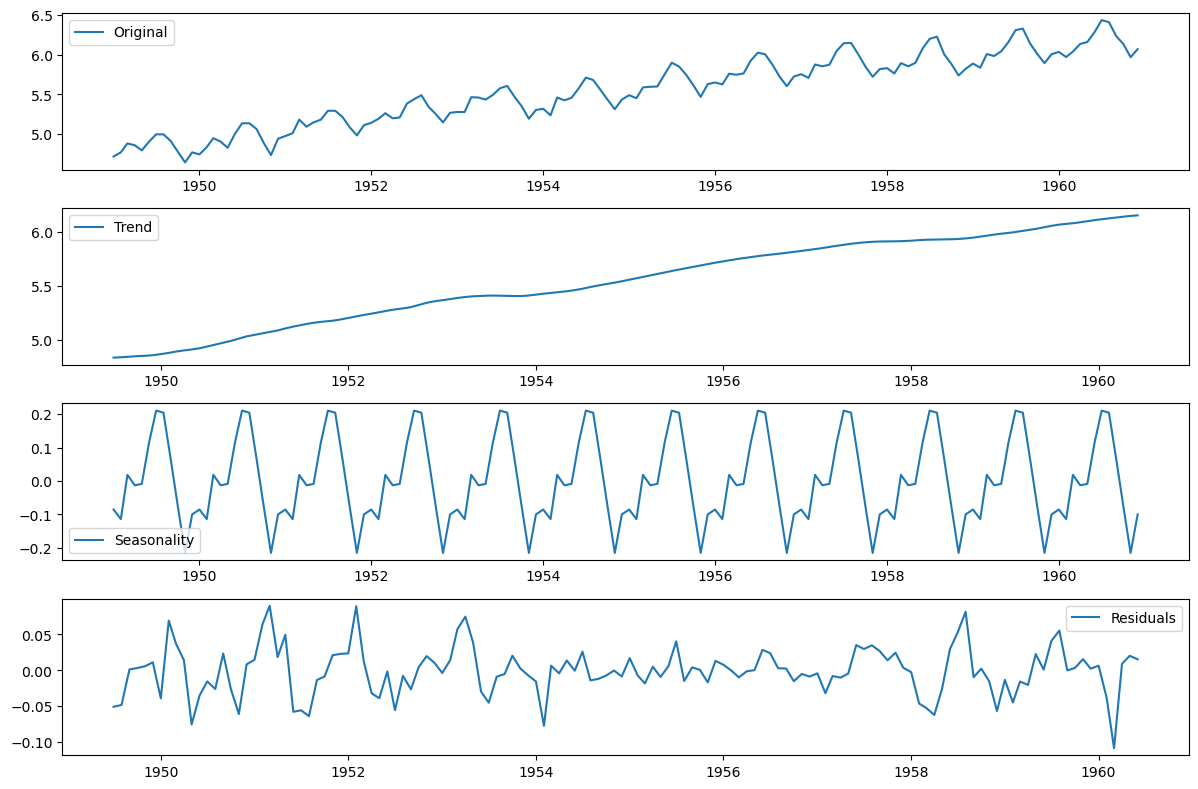

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(log_data, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(log_data, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


## Residual Stationarity Test

The residuals from the decomposition were tested for stationarity using the ADF test. The results confirmed that the residuals were stationary, with a p-value less than 0.05.

In [15]:
# Check stationarity of the residuals
residual.dropna(inplace=True)
result_resid = adfuller(residual)
print(f'ADF Statistic (Residuals): {result_resid[0]}')
print(f'p-value (Residuals): {result_resid[1]}')
print(f'Critical Values (Residuals): {result_resid[4]}')

if result_resid[1] < 0.05:
    print("The residual series is stationary.")
else:
    print("The residual series is not stationary.")


ADF Statistic (Residuals): -6.332386797644868
p-value (Residuals): 2.8850589033233625e-08
Critical Values (Residuals): {'1%': -3.4851223522012855, '5%': -2.88553750045158, '10%': -2.5795685622144586}
The residual series is stationary.


## Conclusion

The analysis involved applying logarithmic transformation, differencing, and seasonal decomposition to ensure the stationarity of the AirPassengers dataset. The ADF tests before and after these transformations confirmed that the series became stationary, which is essential for accurate time series modeling and forecasting. These steps help prepare the data for further analysis, ensuring it meets the necessary assumptions for time series models.